In [540]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [541]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import IPython.display as display
import os

from classes import *
from tqdm import tqdm
from utils import *

from pyswip import Prolog
from typing import List, Tuple

# fix the seed for reproducibility (not fixing the seed for the whole program since we have imports!)
random.seed(667)
np.random.seed(667)

# minihack env creation with a .des file

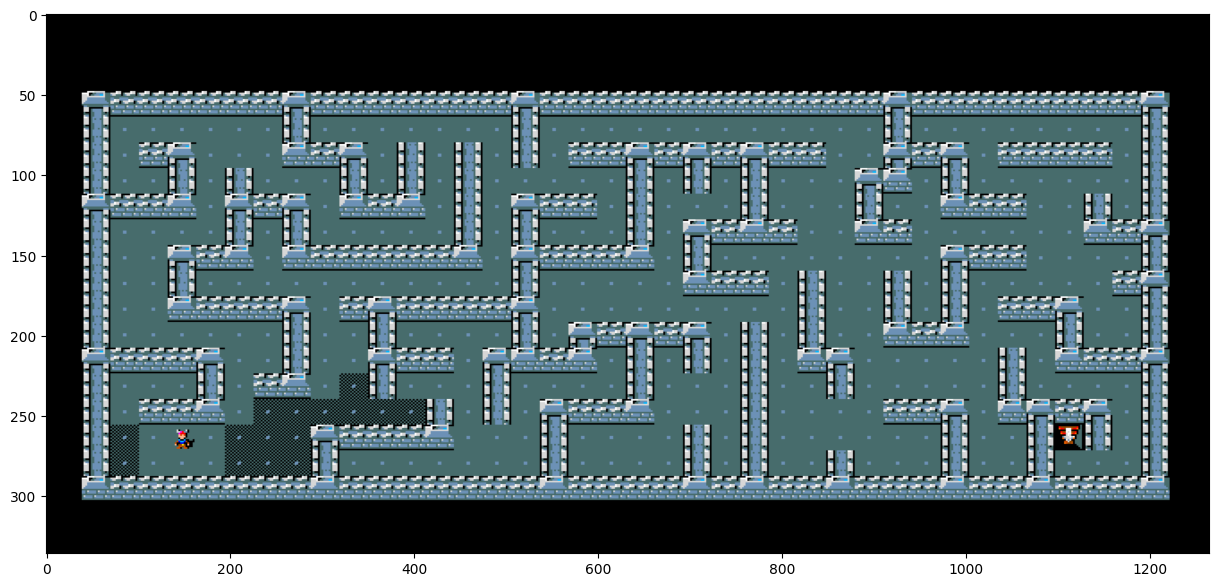

In [542]:
plt.rcParams["figure.figsize"] = [15, 7]
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file="maps/real_maze.des",
    max_episode_steps=10000,
)
state = env.reset()
# env.render()
plt.imshow(state["pixel"], aspect="auto").set_data(state["pixel"][:, 300:950])  # type: ignore

In [543]:
state = env.reset()
game_map = state["chars"]  # type: ignore
game = state["pixel"]  # type: ignore
start = get_player_location(game_map)
target = get_target_location(game_map)
game_map = Map(game_map, start, target)

> start: (16, 23), target: (16, 54)
> map size: (21, 79)


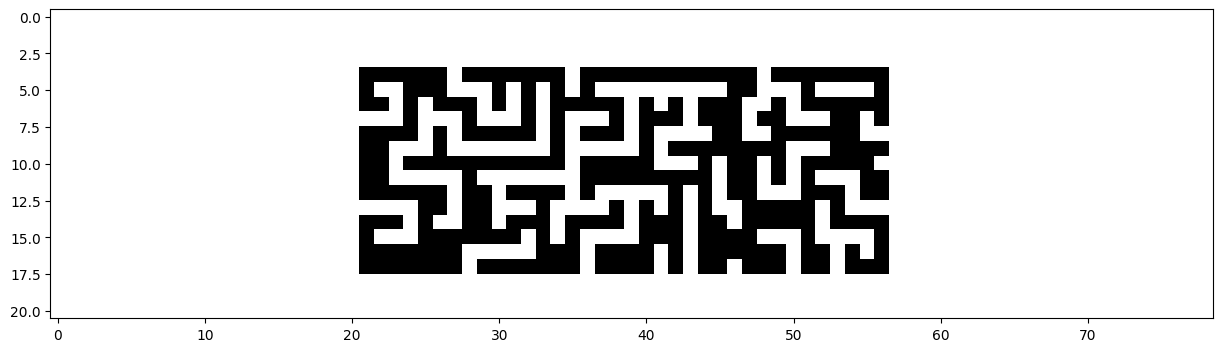

In [544]:
print(f"> start: {game_map.start}, target: {game_map.target}")
print(f"> map size: {game_map.layout.shape}")
# print the map_matrix with matplotlib where the walls are black and the floor is white
plt.imshow(game_map.map_matrix, cmap="gray")
plt.show()

In [545]:
PATH = "kb/kb.pl"
KB = Prolog()
KB.consult(PATH)

KB.retractall("maze(_)")
KB.retractall("start(_,_)")
KB.asserta(f"maze({game_map.map_matrix})")
KB.asserta(f"start({game_map.start[0]}, {game_map.start[1]})")

for i in KB.query("maze(X)"):
    print(f'{i["X"]}\n')  # type: ignore

# list(KB.query("maze(X)"))

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# NTH1

In Prolog, `nth1/3` is a built-in predicate that is used to access elements in a list by index. The `nth1/3` predicate has the following form:

```prolog
nth1(Index, List, Element)
```
Index: The index of the element you want to access.

List: The list from which you want to access the element.

Element: The variable that will be unified with the element at the specified index.


In [546]:
result = list(KB.query("maze(M), nth1(14, M, Row), nth1(23, Row, Cell)"))
if result:
    cell_value = result[0]["Cell"]  # type: ignore
    print(f"Cell value: {cell_value}")
else:
    print("Query result is empty.")

solution = list(KB.query(f"is_valid(14,23)"))
if solution:
    print("Position is valid.")
else:
    print("Position is not valid.")

l1 = list(KB.query("start(ROW,COL)"))
l2 = list(KB.query(f"is_valid(9,23)"))
l3 = list(KB.query(f"is_valid(9,23)"))
l4 = list(KB.query(f"is_valid_action(11,23,0)"))
l5 = list(KB.query(f"is_valid_action(10,23,0)"))
print(l1, l2, l3, l4, l5)

Cell value: 1
Position is not valid.
[{'ROW': 16, 'COL': 23}] [{}] [{}] [{}] [{}]


# We have to decide if we want to generate a random path or random actions

random path $\Rightarrow$ a path of exactly n steps

random actions $\Rightarrow$ many action will be not valid $\Rightarrow$ the path will be shorter OR, as is implemented now, with many repetition of the same position.

# NOTE:
minihack wont crash if we input a not valid action starting from a valid action. It will simply not execute the action (as if we are playing), hence we are updating the path position with the same position.

In [547]:
# create first generation
MAX_GENERATIONS = 200
MAX_INDIVIDUALS = 16

state = env.reset()
game_map = state["chars"]  # type: ignore
game = state["pixel"]  # type: ignore
start = get_player_location(game_map)
target = get_target_location(game_map)
game_map = Map(game_map, start, target)


best_individuals = []

print("> Creating initial population...")
individuals = [
    Individual(random_nactions(300), 1, game_map) for _ in range(MAX_INDIVIDUALS)
]
individuals.sort(key=lambda x: x.fitness, reverse=True)
print("> Evolving...")


with tqdm(total=MAX_GENERATIONS, colour="#9244c9", ncols=150) as pbar:
    for generation in range(MAX_GENERATIONS):
        best_fitness = individuals[0].fitness
        best_individuals.append(individuals[0])
        if generation % 25 == 0:
            print(
                format_loop.format(
                    generation,
                    best_fitness,
                    individuals[0].wrong_actions,
                    individuals[0].loops,
                    individuals[0].dead_ends,
                    individuals[0].distance,
                )
            )

        # take 2 best individuals -> maybe can be replaced with probability distribution based on fitness
        # also roulette wheel selection.
        p1, p2 = individuals[0], individuals[1]
        errors = p1.error_vector + p2.error_vector
        
        crossovers = [
           crossover(p1.actions, p2.actions)
              for _ in range(MAX_INDIVIDUALS)
        ]

        offspring = []
        for m in range(MAX_INDIVIDUALS):
           i = crossovers[m]['index']
           #wrong_action_bitmaps = p1.va[:i] + p2.va[i:]
           wrong_action_bitmaps = p1.va[:i]
           wrong_action_bitmaps = np.append(wrong_action_bitmaps, np.zeros(300 - len(wrong_action_bitmaps)))
           offspring.append(softmax_mutate(crossovers[m]['actions'], errors, wrong_action_bitmaps, generation=generation))
        

        #offspring = [
        #    softmax_mutate(
        #       crossover(p1.actions, p2.actions), errors, generation=generation
        #    )
        #    for _ in range(MAX_INDIVIDUALS)
        #]

        individuals[2:] = [
            Individual(offspring[i], generation, game_map)
            for i in range(MAX_INDIVIDUALS - 2)
        ]
        individuals.sort(key=lambda x: x.fitness, reverse=True)

        if individuals[0].won:
            break

        pbar.set_postfix(
            best_fitness=best_fitness,
            distance=individuals[0].distance,
            dead_ends=individuals[0].dead_ends / 30,
            loops=individuals[0].loops / 30,
            wrong_actions=individuals[0].wrong_actions / 30,
            refresh=False,
        )

        pbar.update(1)

best_fitness = individuals[0].fitness
best_individuals.append(individuals[0])
print(f"best_individual in generation {generation}: {best_fitness}, wrong actions: {individuals[0].wrong_actions}")  # type: ignore

> Creating initial population...
> Evolving...


  0%|                                                                                                                         | 0/200 [00:00<?, ?it/s]

best_individual in generation 0: fitness: -26, wrong actions: 101, loops: 90, dead_ends: 1, distance: 20


 13%|████                           | 26/200 [00:03<00:23,  7.27it/s, best_fitness=-24, dead_ends=0.0333, distance=19, loops=2.53, wrong_actions=3.47]

best_individual in generation 25: fitness: -24, wrong actions: 104, loops: 76, dead_ends: 1, distance: 19


 26%|█████████▏                          | 51/200 [00:07<00:16,  8.85it/s, best_fitness=-23, dead_ends=0, distance=19, loops=2.93, wrong_actions=2.87]

best_individual in generation 50: fitness: -23, wrong actions: 86, loops: 88, dead_ends: 0, distance: 19


 38%|████████████▎                   | 77/200 [00:09<00:11, 10.65it/s, best_fitness=-22, dead_ends=0.133, distance=18, loops=2.33, wrong_actions=2.97]

best_individual in generation 75: fitness: -22, wrong actions: 89, loops: 70, dead_ends: 4, distance: 18


 50%|███████████████▋               | 101/200 [00:11<00:07, 12.39it/s, best_fitness=-22, dead_ends=0.133, distance=18, loops=2.33, wrong_actions=2.97]

best_individual in generation 100: fitness: -22, wrong actions: 89, loops: 70, dead_ends: 4, distance: 18


 64%|███████████████████▋           | 127/200 [00:13<00:04, 14.73it/s, best_fitness=-22, dead_ends=0.133, distance=18, loops=2.33, wrong_actions=2.97]

best_individual in generation 125: fitness: -22, wrong actions: 89, loops: 70, dead_ends: 4, distance: 18


 76%|███████████████████████▋       | 153/200 [00:15<00:02, 15.88it/s, best_fitness=-22, dead_ends=0.133, distance=18, loops=2.33, wrong_actions=2.97]

best_individual in generation 150: fitness: -22, wrong actions: 89, loops: 70, dead_ends: 4, distance: 18


 88%|███████████████████████████▍   | 177/200 [00:16<00:01, 19.08it/s, best_fitness=-22, dead_ends=0.133, distance=18, loops=2.33, wrong_actions=2.97]

best_individual in generation 175: fitness: -22, wrong actions: 89, loops: 70, dead_ends: 4, distance: 18


100%|███████████████████████████████| 200/200 [00:17<00:00, 11.28it/s, best_fitness=-22, dead_ends=0.133, distance=18, loops=2.33, wrong_actions=2.97]

best_individual in generation 199: -22, wrong actions: 89


In [548]:
individuals[0].loops

70

In [567]:
wrong_action_bitmaps = []
wrong_action_bitmaps = individuals[0].va[:50]
len(wrong_action_bitmaps)
# appennd zeros to the end of the array until reaching 300
wrong_action_bitmaps = np.append(wrong_action_bitmaps, np.zeros(300 - len(wrong_action_bitmaps)))
type(wrong_action_bitmaps)

numpy.ndarray

In [549]:
actions = [0,1,2,3,4,5,6,7,8,9,10,11,12]
actions = np.append(actions, np.random.choice([0, 1, 2, 3]))
actions

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  3])

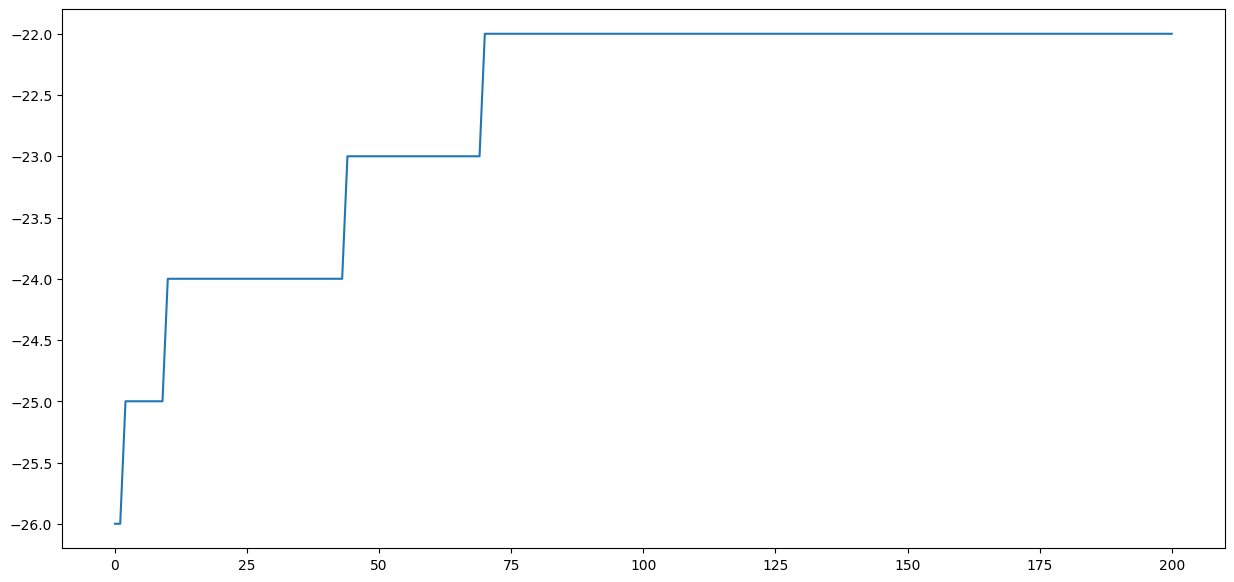

In [550]:
# Plot for each generation the best fitness
best_fitness = [best_individuals[i].fitness for i in range(len(best_individuals))]
plt.plot(best_fitness)

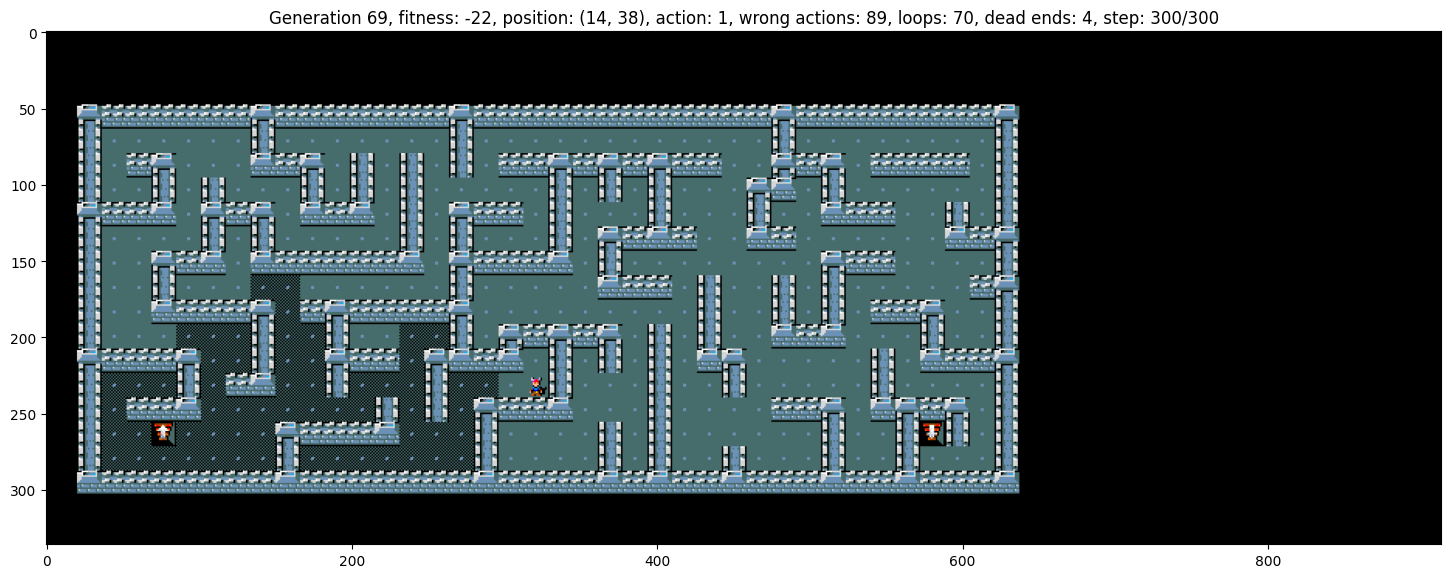

In [551]:
env.reset()
plt.rcParams["figure.figsize"] = [18, 7]

image = plt.imshow(game[:, 350:1500])
# for generation, path in enumerate(best_paths):
# plt.title(f"Generation {generation}, fitness: {best_scores[generation]:.2f}, last move: {path[-1]}")
# start = best_paths[0]
# path = best_paths[-1]
actions = []
actions = individuals[0].actions
wrong = 0

for i, action in enumerate(actions):
    try:
        s, _, _, _ = env.step(action)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.title(
            format_title.format(
                individuals[0].generation,
                individuals[0].fitness,
                individuals[0].path[i],
                action,
                wrong,
                individuals[0].loops,
                individuals[0].dead_ends,
                i + 1,
                len(actions),
            )
        )
        image.set_data(s["pixel"][:, 300:1200])
        # time.sleep(0.1)
        if individuals[0].path[i] == game_map.target:
            print("YOU WON! <3")
            break
        if individuals[0].path[i] == individuals[0].path[i - 1]:
            wrong += 1
    except RuntimeError:
        print("YOU WON! <3")